In [43]:
from keras.preprocessing import image

In [44]:
pug = image.load_img('pug.jpg')

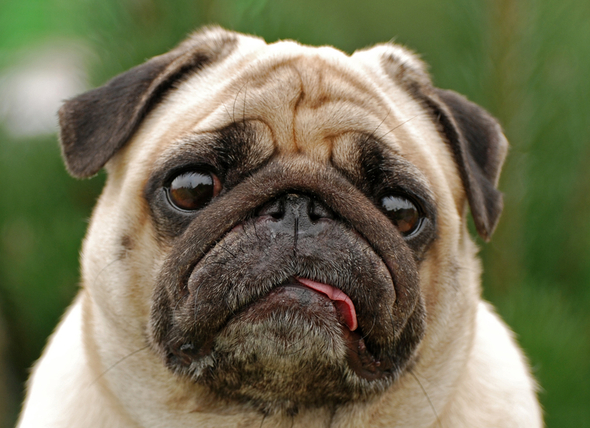

In [45]:
pug

In [46]:
#note: keras uses Pillow Library in backend.
type(pug)

PIL.JpegImagePlugin.JpegImageFile

In [47]:
pug.size

(590, 428)

In [48]:
from keras.applications import inception_v3

In [49]:
#using imagenet dataset.
model = inception_v3.InceptionV3(weights='imagenet')

In [50]:
model.layers[0].input

<tf.Tensor 'input_4:0' shape=(None, 299, 299, 3) dtype=float32>

In [51]:
#as we can see in inception model input layers accepts a image size (299,299)
pug = pug.resize((299,299))

In [52]:
pug_arr = image.img_to_array(pug)

In [53]:
pug_arr.shape

(299, 299, 3)

In [54]:
import numpy as np 

In [55]:
pug_expand = np.expand_dims(pug_arr,axis=0) 
#converting 1D image data into 2D..

In [56]:
pug_expand.shape

(1, 299, 299, 3)

In [58]:
from keras.applications.inception_v3 import decode_predictions

In [59]:
from keras.applications.inception_v3 import preprocess_input

In [60]:
pug_process = preprocess_input(pug_expand)

In [61]:
pred = model.predict(pug_process)

In [62]:
decode_predictions(pred)

[[('n02110958', 'pug', 0.9139081),
  ('n02108422', 'bull_mastiff', 0.003355478),
  ('n02112706', 'Brabancon_griffon', 0.0013211867),
  ('n02096585', 'Boston_bull', 0.0010834946),
  ('n02108915', 'French_bulldog', 0.0009609838)]]

In [63]:
#predicting multiple images

In [64]:
import os
folder_path='C://Users//dasaw//Documents//mlops_ws//PythonNotebooks//CNN'
images = []
for file in os.listdir(folder_path):
    name,ext = os.path.splitext(file)
    print("name: ",name)
    print("ext: ",ext,"\n")
    if (ext == '.jpg'):
        img = os.path.join(folder_path, file)
        img = image.load_img(img, target_size=(299,299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        final_img = preprocess_input(img)
        images.append(final_img)

name:  .ipynb_checkpoints
ext:   

name:  gs
ext:  .jpg 

name:  labrador
ext:  .jpg 

name:  mithu
ext:  .jpg 

name:  pug
ext:  .jpg 

name:  Untitled
ext:  .ipynb 

name:  VGG16_VGG19_Keras_Pillow
ext:  .ipynb 



In [65]:
# image list needs to be stacked up, in order to pass it for prediction..
images = np.vstack(images)

In [66]:
pred = model.predict(images,batch_size=5)

In [67]:
decode_predictions(pred)

[[('n02106662', 'German_shepherd', 0.82137394),
  ('n02105162', 'malinois', 0.047183346),
  ('n02916936', 'bulletproof_vest', 0.0050403373),
  ('n02105056', 'groenendael', 0.002343549),
  ('n02096051', 'Airedale', 0.001632501)],
 [('n02099712', 'Labrador_retriever', 0.9322212),
  ('n02099601', 'golden_retriever', 0.02495838),
  ('n02104029', 'kuvasz', 0.0008470652),
  ('n02808304', 'bath_towel', 0.00071693776),
  ('n06359193', 'web_site', 0.00058676227)],
 [('n01819313', 'sulphur-crested_cockatoo', 0.09712762),
  ('n02966193', 'carousel', 0.024608634),
  ('n01843383', 'toucan', 0.02412173),
  ('n01818515', 'macaw', 0.01946154),
  ('n01443537', 'goldfish', 0.011949173)],
 [('n02110958', 'pug', 0.9139081),
  ('n02108422', 'bull_mastiff', 0.0033554845),
  ('n02112706', 'Brabancon_griffon', 0.0013211854),
  ('n02096585', 'Boston_bull', 0.001083494),
  ('n02108915', 'French_bulldog', 0.0009609838)]]